# Описание проекта
### Анализ топ 100 яндекс музыки.
# Основная информация:
### Есть данные об топ 100 исполнителей, на момент от 21 сентября 2023 г:
# Нужно изучить:
### 1.Какой жанр пользуется наибольшим количеством прослушиваний и лайков.
### 2.Оценить, как наличие откровенного контента влияет на количество прослушиваний и лайков.
### 3.Определить, какие исполнители наиболее популярны среди топ-100 треков.
### 4.Определить 10 самых популярных треков среди топ-100 и проанализируйте их более подробно.
### 5.Спрогнозировать популярность трека.
# Информация о данных и их структура:
### Файл yandex100.csv хранит информацию о топ 100 исполнителей.
# Структура yandex100.csv:
### track_len - Название трека.
### link - Ссылка на трек на сайте Яндекс.Музыки.
### genre - Жанр трека.
### artist(s) - Исполнитель или исполнители трека (может содержать несколько имен).
### chart - позиция трека в чарте (предположительно в топ-100).
### Explicit_content - индикатор явного содержания (1 – присутствует, 0 – отсутствует).
### monthly_listens_total - Общее количество прослушиваний исполнителя(ей) в месяц.
### artists_likes_total - количество лайков исполнителя(ей) трека.

### импортирование основных библиотек 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('C:/Users/admin/documents/yandex100.csv')

In [3]:
df.head()

,name,track_len,link,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,https://music.yandex.ru//album/26605629/track/...,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,https://music.yandex.ru//album/26697445/track/...,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,https://music.yandex.ru//album/26607707/track/...,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,https://music.yandex.ru//album/25361122/track/...,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,https://music.yandex.ru//album/25163882/track/...,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523


## Удалим лишний столбец

In [4]:
df.drop('link',axis = 1, inplace = True)

In [5]:
df.head()

,name,track_len,genre,artist(s),chart,Explicit_content,monthly_listens_total,artists_likes_total
0,Царица,3:35,русская поп-музыка,['ANNA ASTI'],1,0,4847753,2120528
1,Плохая Девочка,2:15,русский рэп,"['Винтаж', 'ТРАВМА', 'SKIDRI', 'DVRKLXGHT']",2,0,16677658,417013
2,Я плачу,1:54,русская поп-музыка,['A.V.G'],3,0,4406023,287295
3,ASPHALT 8,2:15,русский рэп,['MACAN'],4,0,5149399,2359899
4,Где прошла ты,2:48,русский рэп,"['Кравц', 'Гио Пика']",5,0,9058111,1509523


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   name                   100 non-null    object
 1   track_len              100 non-null    object
 2   genre                  100 non-null    object
 3   artist(s)              100 non-null    object
 4   chart                  100 non-null    int64 
 5   Explicit_content       100 non-null    int64 
 6   monthly_listens_total  100 non-null    int64 
 7   artists_likes_total    100 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 6.4+ KB


# Проверка на пропущенные значения

In [7]:
df.isna().sum()

name                     0
track_len                0
genre                    0
artist(s)                0
chart                    0
Explicit_content         0
monthly_listens_total    0
artists_likes_total      0
dtype: int64

In [8]:
df[df['monthly_listens_total'] < 5].index


Int64Index([43], dtype='int64')

In [9]:
df.describe()

,chart,Explicit_content,monthly_listens_total,artists_likes_total
count,100.000000,100.000000,1.000000e+02,1.000000e+02
mean,50.500000,0.220000,4.054831e+06,1.660509e+06
std,29.011492,0.416333,2.654050e+06,1.832553e+06
min,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,25.750000,0.000000,2.363363e+06,1.129340e+05
50%,50.500000,0.000000,3.582027e+06,9.728075e+05
75%,75.250000,0.000000,4.847753e+06,2.409956e+06
max,100.000000,1.000000,1.667766e+07,8.379202e+06


# Проверка на дубликаты

In [10]:
df[df.duplicated()].sum()

name                     0.0
track_len                0.0
genre                    0.0
artist(s)                0.0
chart                    0.0
Explicit_content         0.0
monthly_listens_total    0.0
artists_likes_total      0.0
dtype: float64

# Цель №1: Выяснить какой жанр пользуется наибольшим количеством прослушиваний и какой жанр имеет наибольшее сумарное количество лайков

In [13]:
popular_genre_listens = df.groupby('genre')['monthly_listens_total'].sum()
popular_genre_listens

genre
гиперпоп                 903121
индастриал              1840688
кавказская музыка       2035200
панк                   30689647
поп                     3492475
русская поп-музыка    172165551
русский рок             4805309
русский рэп           181475383
хаус                    3389073
электроника             4686638
Name: monthly_listens_total, dtype: int64

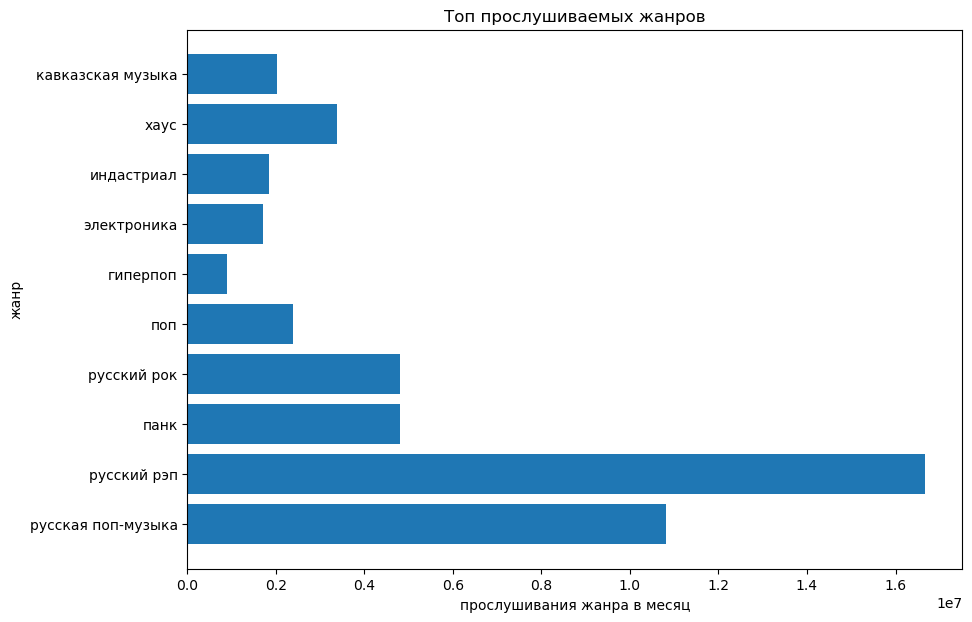

In [14]:
plt.figure(figsize = (10,7))

plt.barh(df['genre'],df['monthly_listens_total'],)
plt.title('Топ прослушиваемых жанров')
plt.xlabel('прослушивания жанра в месяц')
plt.ylabel('жанр')

plt.show()

In [15]:
# Наиболее понравившиеся
popular_genre_listens = df.groupby('genre')['artists_likes_total'].sum()
popular_genre_listens

genre
гиперпоп                  4007
индастриал             2789684
кавказская музыка      1905638
панк                  25907410
поп                     930820
русская поп-музыка    68155653
русский рок            4044357
русский рэп           62223435
хаус                     12184
электроника              77680
Name: artists_likes_total, dtype: int64

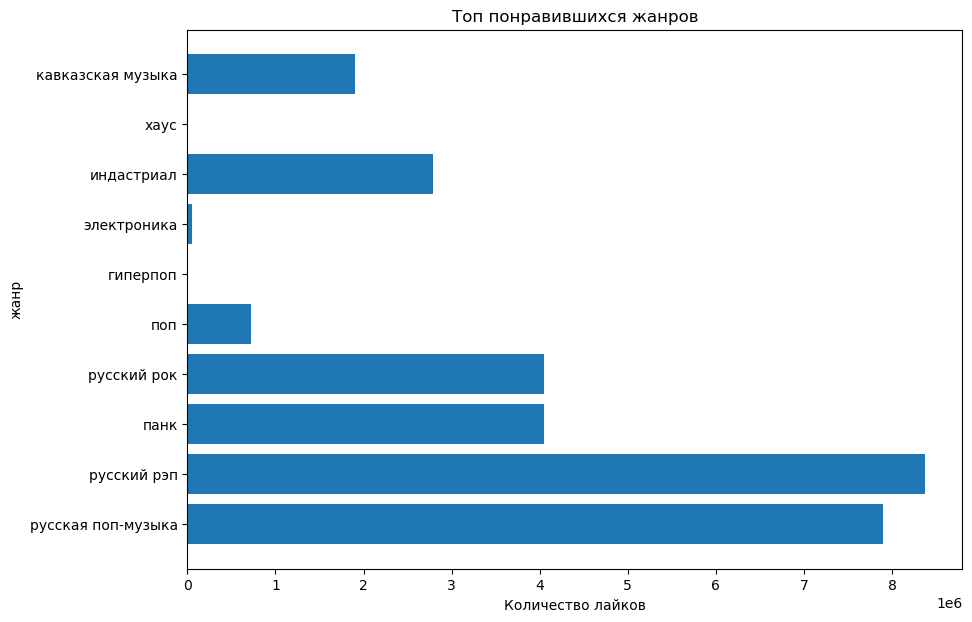

In [16]:
plt.figure(figsize = (10,7))

plt.barh(df['genre'],df['artists_likes_total'],)
plt.title('Топ понравившихся жанров')
plt.xlabel('Количество лайков')
plt.ylabel('жанр')

plt.show()

### Как можно увидеть наиболее понравившийся и прослушиваемый жанр - русский рэп за ним по количеству лайков и прослушиваний следует русская поп музыка

## Цель №2: Определить 10 самых популярных исполнителей среди топ-100

In [17]:
grouped_10 = df.groupby('artist(s)')[['monthly_listens_total','artists_likes_total']].sum()
top_10 = grouped_10.sort_values(by = ['artists_likes_total','monthly_listens_total'],ascending = [False,False]).head(10)
top_10

,monthly_listens_total,artists_likes_total
artist(s),,
['Король и Шут'],33637163,28310538
['JONY'],17577825,14395063
['ANNA ASTI'],29086518,12723207
"['Miyagi & Эндшпиль', 'Рем Дигга']",6008773,8379202
['Oxxxymiron'],6493376,8361803
['MOT'],11521982,7916211
['Artik & Asti'],4208954,7897520
['MACAN'],15448197,7079709
['GAYAZOV$ BROTHER$'],7164054,5955162


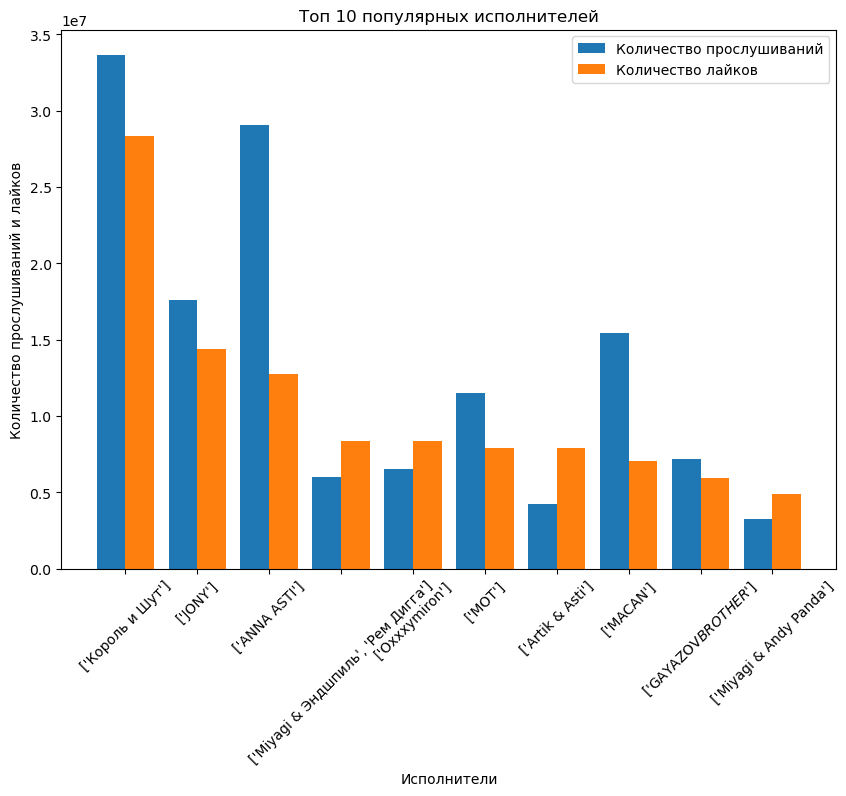

In [18]:
plt.figure(figsize = (10,7))

x = np.arange(len(top_10))

offset = 0.2

w = 0.4

plt.bar(x - offset, top_10['monthly_listens_total'],width = w)
plt.bar(x + offset, top_10['artists_likes_total'],width = w)

plt.title('Топ 10 популярных исполнителей')
plt.xlabel('Исполнители')
plt.ylabel('Количество прослушиваний и лайков')
plt.legend(['Количество прослушиваний','Количество лайков'])

plt.xticks(x, top_10.index, rotation=45)

plt.show()

# Цель 3: Определить 10 самых популярных треков среди топ-100

In [19]:
grouped_10_tracks = df.groupby('name')[['monthly_listens_total','artists_likes_total']].sum()
top_10_tracks = grouped_10_tracks.sort_values(by = ['artists_likes_total','monthly_listens_total'],ascending = [False,False]).head(10)
top_10_tracks

,monthly_listens_total,artists_likes_total
name,,
I Got Love,6008773,8379202
Кукла,4208954,7897520
Minor,3278700,4865784
Как любовь твою понять?,5859275,4798361
Воздушный Сарафан,5859275,4798351
Не смогу забыть,5859275,4798351
Не вспоминай,9595600,4662989
Чёрный Русский,2857140,4296461
1.Kla$ Pt. 2,3595072,4206008


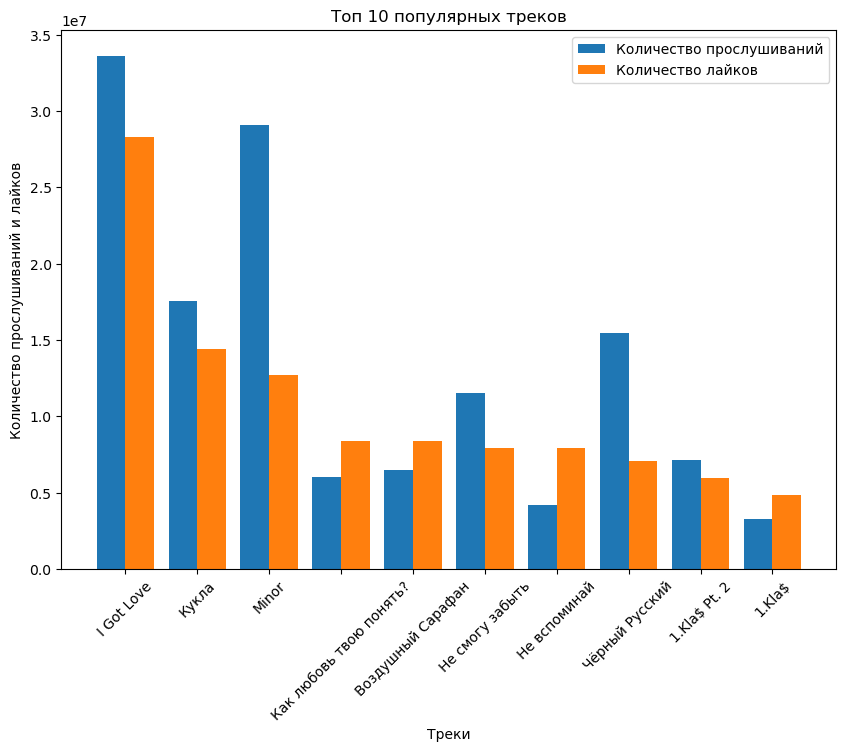

In [20]:
plt.figure(figsize = (10,7))

x = np.arange(len(top_10_tracks))

offset = 0.2

w = 0.4

plt.bar(x - offset, top_10['monthly_listens_total'],width = w)
plt.bar(x + offset, top_10['artists_likes_total'],width = w)

plt.title('Топ 10 популярных треков')
plt.xlabel('Треки')
plt.ylabel('Количество прослушиваний и лайков')
plt.legend(['Количество прослушиваний','Количество лайков'])

plt.xticks(x, top_10_tracks.index, rotation=45)

plt.show()

# Цель 4:Выявить какие признаки коррелируют между собой больше всего

C:\Users\admin\AppData\Local\Temp\ipykernel_12644\3529080420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


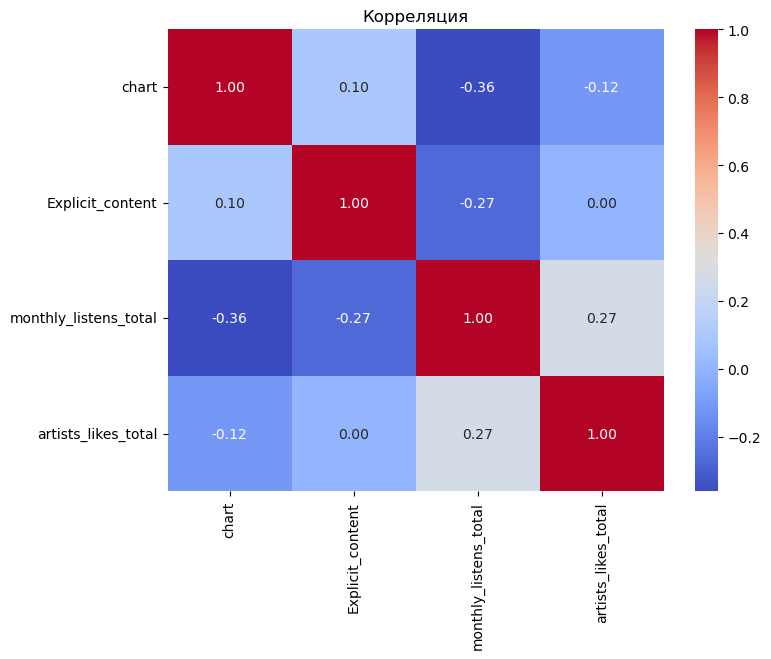

In [21]:
df_corr = df.corr()
plt.figure(figsize = (8,6))
sns.heatmap(df_corr, annot=True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Корреляция')
plt.show()

### Как можно увидеть количество прослушиваний коррелируют с количесвом лайков что говорит о том что при увеличение прослушиваемости увеличивается количество лайков


# Цель №5: Изучить влияние откровенного контента

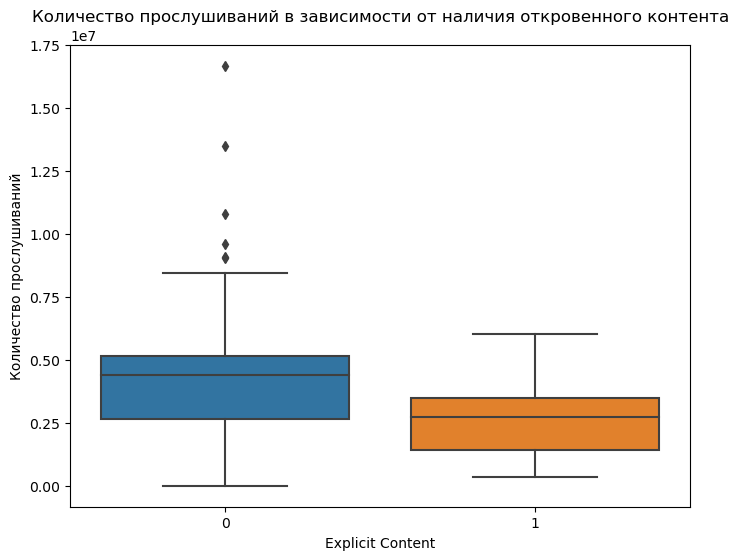

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Explicit_content', y='monthly_listens_total', data=df)
plt.xlabel('Explicit Content')
plt.ylabel('Количество прослушиваний')
plt.title('Количество прослушиваний в зависимости от наличия откровенного контента')
plt.show()

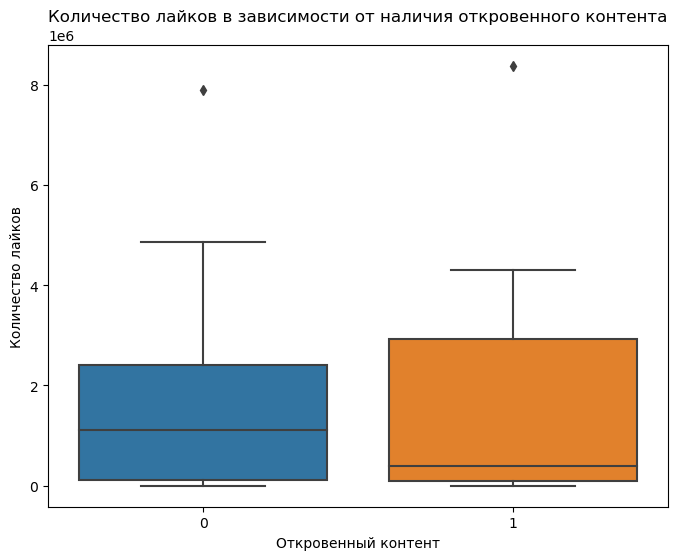

In [25]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Explicit_content', y='artists_likes_total', data=df)
plt.xlabel('Откровенный контент')
plt.ylabel('Количество лайков')
plt.title('Количество лайков в зависимости от наличия откровенного контента')
plt.show()

### Построив ящики с усами можно сказать о том что песни у которых присутсвует откровенный контент,количеству прослушиваний и лайков меньше чем у треков где откровенный контент отсутсвует

# Цель №6: прогнозирование прослушиваемости


## Для прогноза будем применять множественную линейную регрессию

### Просмотрим количество категориальных и числовых значений

In [26]:
numerical_df = df.dtypes[df.dtypes !='object'].index
print('Quantity of Numerical features ', len(numerical_df),end='\n')
print(df[numerical_df].columns)
object_df = df.dtypes[df.dtypes =='object'].index
print('Quantity of Categorical features', len(object_df),'\n')
print(df[object_df].columns)

Quantity of Numerical features  4
Index(['chart', 'Explicit_content', 'monthly_listens_total',
       'artists_likes_total'],
      dtype='object')
Quantity of Categorical features 4 

Index(['name', 'track_len', 'genre', 'artist(s)'], dtype='object')


### Визуализируем числовые значения

array([[<Axes: xlabel='chart', ylabel='chart'>,
        <Axes: xlabel='Explicit_content', ylabel='chart'>,
        <Axes: xlabel='monthly_listens_total', ylabel='chart'>,
        <Axes: xlabel='artists_likes_total', ylabel='chart'>],
       [<Axes: xlabel='chart', ylabel='Explicit_content'>,
        <Axes: xlabel='Explicit_content', ylabel='Explicit_content'>,
        <Axes: xlabel='monthly_listens_total', ylabel='Explicit_content'>,
        <Axes: xlabel='artists_likes_total', ylabel='Explicit_content'>],
       [<Axes: xlabel='chart', ylabel='monthly_listens_total'>,
        <Axes: xlabel='Explicit_content', ylabel='monthly_listens_total'>,
        <Axes: xlabel='monthly_listens_total', ylabel='monthly_listens_total'>,
        <Axes: xlabel='artists_likes_total', ylabel='monthly_listens_total'>],
       [<Axes: xlabel='chart', ylabel='artists_likes_total'>,
        <Axes: xlabel='Explicit_content', ylabel='artists_likes_total'>,
        <Axes: xlabel='monthly_listens_total', ylabel='

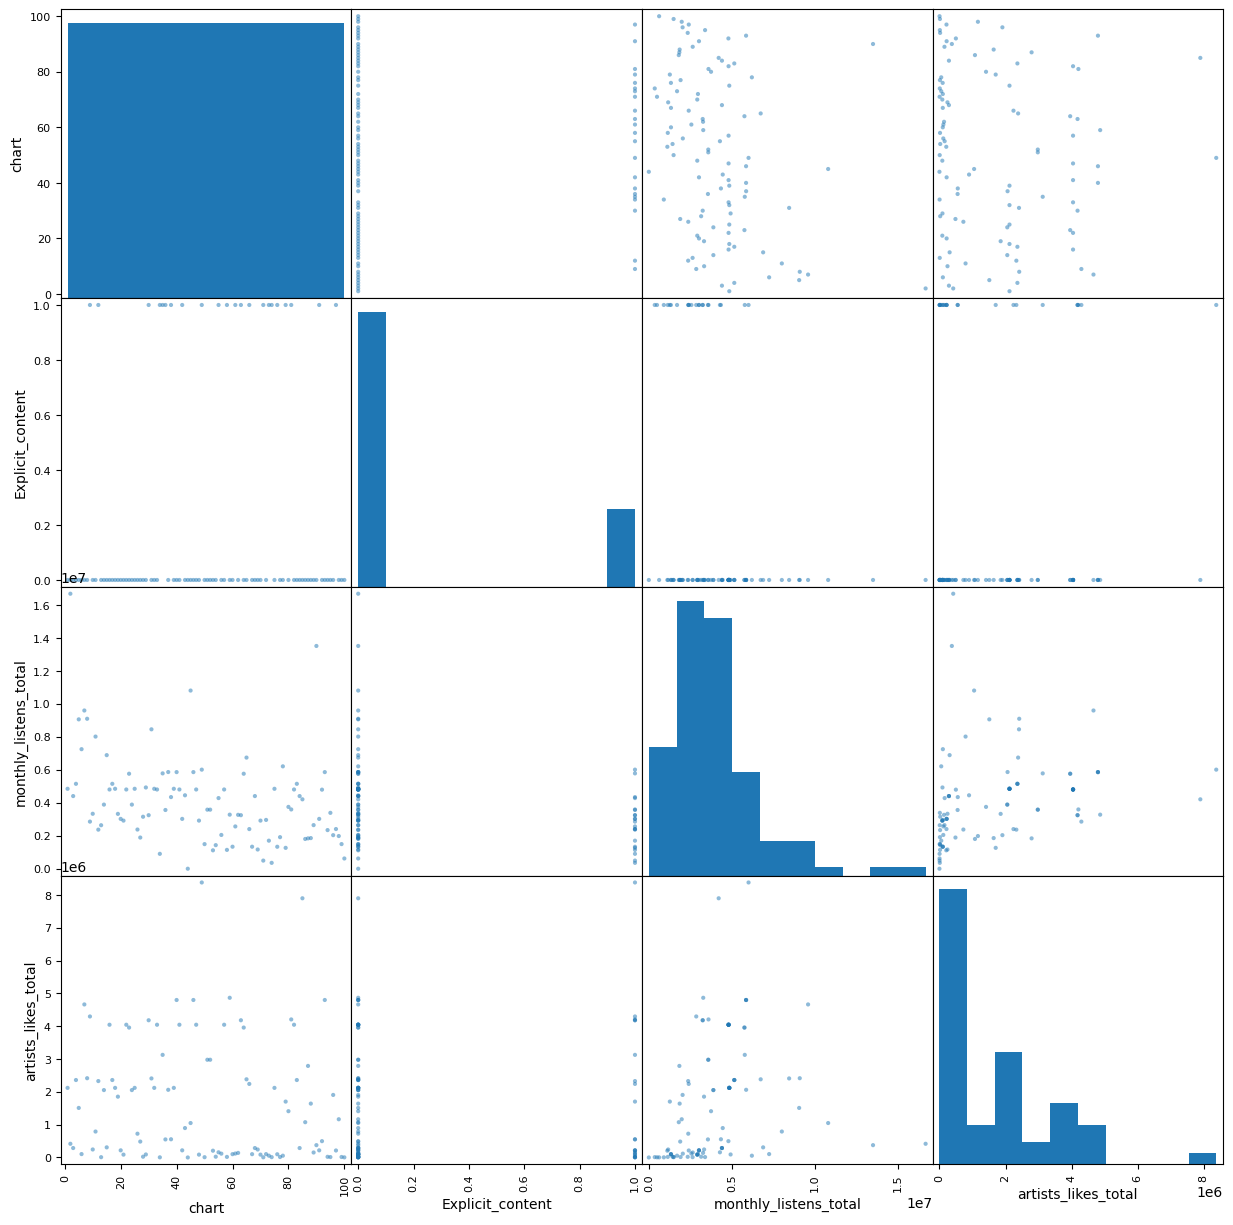

In [27]:
pd.plotting.scatter_matrix(df,figsize=(15,15)) # диаграмма рассеивания 

### Построим ящики с усами для числовых значений

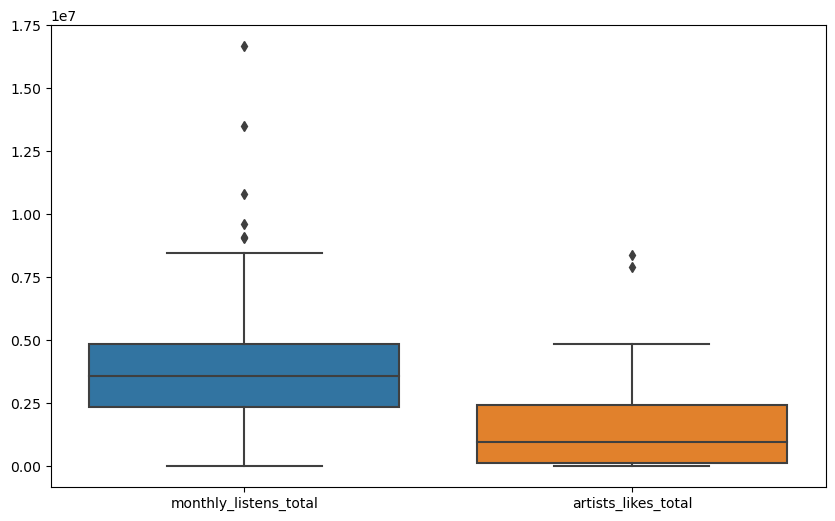

In [28]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df[[ 'monthly_listens_total','artists_likes_total']])
plt.show()

### удаляем выбросы

In [29]:
quantiltrash = df['monthly_listens_total'].quantile(0.90)
df = df[df['monthly_listens_total'] <= quantiltrash]
quantiltrash = df['artists_likes_total'].quantile(0.90)
df = df[df['artists_likes_total'] <= quantiltrash]

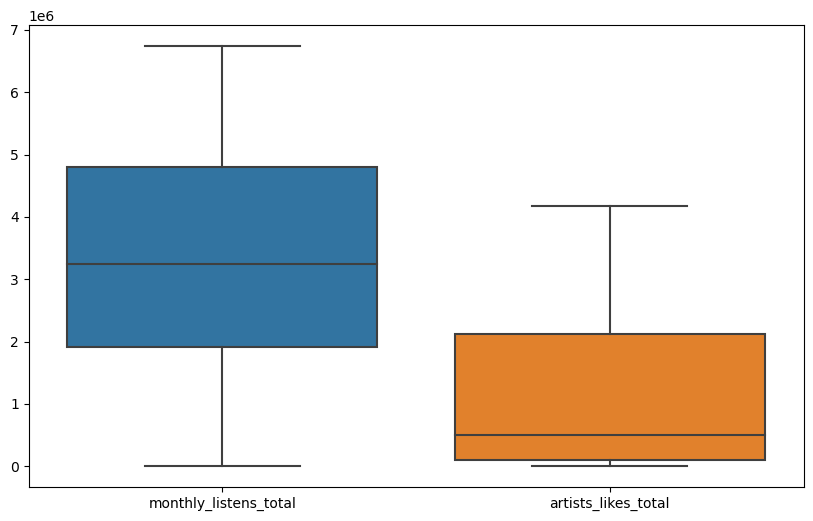

In [30]:
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=df[[ 'monthly_listens_total','artists_likes_total']])
plt.show()

### Проверка на нормальное распределения 

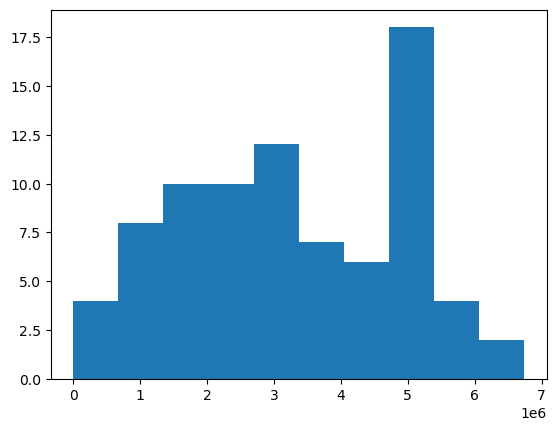

In [31]:
plt.hist(df['monthly_listens_total'])
plt.show()

In [32]:
stat, p = shapiro(df['monthly_listens_total'])

print('Статистика=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принимаем нулевую гипотезу - данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу - данные не распределены нормально')


Статистика=0.968, p=0.043
Отвергаем нулевую гипотезу - данные не распределены нормально


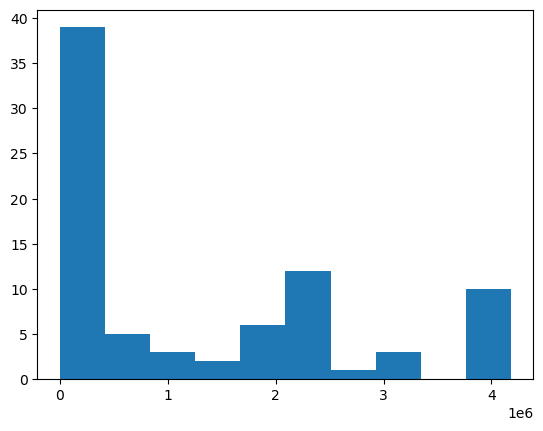

In [33]:
plt.hist(df['artists_likes_total'])
plt.show()

In [34]:
stat, p = shapiro(df['artists_likes_total'])

print('Статистика=%.3f, p=%.3f' % (stat, p))

alpha = 0.05
if p > alpha:
    print('Принимаем нулевую гипотезу - данные распределены нормально')
else:
    print('Отвергаем нулевую гипотезу - данные не распределены нормально')


Статистика=0.813, p=0.000
Отвергаем нулевую гипотезу - данные не распределены нормально


### Приводим категориальные значения в числовые

In [35]:
genre_cols = pd.get_dummies(df['genre'])
genre_cols.head()

,гиперпоп,индастриал,кавказская музыка,панк,поп,русская поп-музыка,русский рок,русский рэп,хаус,электроника
0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,1,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0


### минуты в секунды

In [36]:
def sec_convert(time_str):
    minutes, seconds = map(int, time_str.split(':'))
    total_seconds = minutes * 60 + seconds
    return total_seconds
df['track_len'] = df['track_len'].apply(sec_convert)

In [37]:
# Список признаков которые будут использоваться для построения модели
features_name = ['chart','Explicit_content','artists_likes_total','track_len']

In [38]:
# объединение всех признаков 
X = pd.concat([df[features_name],genre_cols], axis = 1)
X.shape

(81, 14)

In [39]:
X.head()

,chart,Explicit_content,artists_likes_total,track_len,гиперпоп,индастриал,кавказская музыка,панк,поп,русская поп-музыка,русский рок,русский рэп,хаус,электроника
0,1,0,2120528,215,0,0,0,0,0,1,0,0,0,0
2,3,0,287295,114,0,0,0,0,0,1,0,0,0,0
3,4,0,2359899,135,0,0,0,0,0,0,0,1,0,0
9,10,0,243825,178,0,0,0,0,0,1,0,0,0,0
11,12,1,2328130,161,0,0,0,0,0,0,0,1,0,0


In [40]:
# выделение таргета

In [41]:
y = df['monthly_listens_total']

# Нормализация 

In [42]:
#стандартизация признаков
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[-1.88710787, -0.53452248,  0.60000336, ..., -0.8291562 ,
        -0.1118034 , -0.19611614],
       [-1.81473299, -0.53452248, -0.71076363, ..., -0.8291562 ,
        -0.1118034 , -0.19611614],
       [-1.77854555, -0.53452248,  0.77115433, ...,  1.20604538,
        -0.1118034 , -0.19611614],
       ...,
       [ 1.6230736 , -0.53452248, -0.08357735, ...,  1.20604538,
        -0.1118034 , -0.19611614],
       [ 1.65926104, -0.53452248, -0.90558262, ..., -0.8291562 ,
        -0.1118034 ,  5.09901951],
       [ 1.69544847, -0.53452248, -0.91382017, ..., -0.8291562 ,
        -0.1118034 , -0.19611614]])

In [44]:
# стандартизация таргета
y = sc.fit_transform(np.array(df['monthly_listens_total']).reshape(-1, 1))
y

array([[ 0.99272171],
       [ 0.71370949],
       [ 1.18325194],
       [ 0.03564721],
       [-0.57221134],
       [-0.40317566],
       [ 0.3867669 ],
       [ 0.96591259],
       [ 1.18325194],
       [ 0.99272171],
       [ 0.03160538],
       [-0.16034666],
       [-0.22589524],
       [ 0.96591259],
       [ 1.56955498],
       [ 0.3867669 ],
       [ 0.99272171],
       [-0.56823014],
       [-0.87498441],
       [-0.07810776],
       [ 1.04316915],
       [-0.0185673 ],
       [ 0.99272171],
       [ 0.96591259],
       [-1.49884671],
       [ 1.58254329],
       [ 0.18043821],
       [ 1.63431211],
       [ 0.6747755 ],
       [ 0.99272171],
       [ 0.96591259],
       [-0.16034666],
       [ 0.74363132],
       [-2.06928972],
       [ 0.96591259],
       [-0.22589524],
       [-1.12683947],
       [ 0.19324462],
       [ 0.19324462],
       [-1.36437915],
       [-1.16605833],
       [ 0.6365401 ],
       [-0.77552903],
       [ 0.96591259],
       [-1.34759282],
       [-1

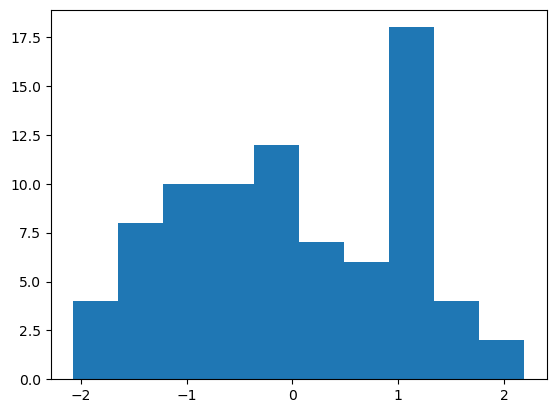

In [45]:
plt.hist(y)
plt.show()

# Обучение модели и оценка качества прогнозирования


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [49]:
LR_pred = lr.predict(X_test)
LR_pred

array([[ 0.05397201],
       [ 0.9068307 ],
       [-0.66973877],
       [-0.20924213],
       [ 0.29439977],
       [ 0.65094992],
       [ 1.1714415 ],
       [ 0.7421837 ],
       [-0.54856217],
       [ 0.77783208],
       [ 0.10815551],
       [-0.0045969 ],
       [ 0.85172188],
       [ 0.60567155],
       [ 0.52712491],
       [ 0.71617373],
       [-0.14426815],
       [-0.57162646],
       [-0.05050847],
       [-0.68815508],
       [-0.70503359],
       [ 0.37188504],
       [ 0.87788176],
       [ 0.60672702],
       [-0.15541604]])

In [83]:
LRscore = lr.score(X_test, y_test)
LRscore

0.5303916773881128

In [60]:
# Денормализация количества прослушиваний
unscaled = sc.inverse_transform(LR_pred)
unscaled

array([[3361531.68413402],
       [4711771.01214382],
       [2215758.32145593],
       [2944813.07182134],
       [3742175.05829557],
       [4306662.52310088],
       [5130700.79348671],
       [4451103.14400722],
       [2407604.18223198],
       [4507541.38212872],
       [3447314.58574086],
       [3268805.82715799],
       [4624523.14595443],
       [4234978.15496346],
       [4110623.71303812],
       [4409924.35849839],
       [3047679.37759407],
       [2371088.98725593],
       [3196118.98745008],
       [2186601.76822613],
       [2159879.84090781],
       [3864849.14102131],
       [4665939.27262622],
       [4236649.17194531],
       [3030030.1201585 ]])